In [1]:
import mplfinance as mpl
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import seaborn as sb


## Fetch stock data

- We are using `y_finance` to download the data
- Take TSMC stock (id is 2330) in Taiwan

In [2]:
data: pd.DataFrame = yf.download('2330.TW',start='2022-6-1')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,550.0,555.0,548.0,549.0,539.798462,29155176
2022-06-02,544.0,545.0,540.0,540.0,530.949280,21420890
2022-06-06,541.0,544.0,538.0,540.0,530.949280,17615003
2022-06-07,535.0,538.0,532.0,535.0,526.033142,19497532
2022-06-08,539.0,545.0,538.0,544.0,534.882263,18835521


In [4]:
data.shape

(188, 6)

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,188.000000,188.000000,188.000000,188.000000,188.000000,1.880000e+02
mean,479.622340,483.361702,475.742021,479.436170,476.185081,3.325622e+07
std,42.342295,42.006678,42.601608,42.598312,42.124128,1.688711e+07
min,370.500000,379.000000,370.000000,371.000000,368.876709,8.793306e+06
25%,457.875000,459.375000,454.625000,456.125000,454.500000,2.191239e+07
50%,488.000000,492.000000,485.000000,487.000000,484.699356,3.015740e+07
75%,508.000000,514.000000,505.500000,509.250000,504.551369,3.960347e+07
max,550.000000,555.000000,548.000000,549.000000,545.000000,1.244289e+08


## Show stock data

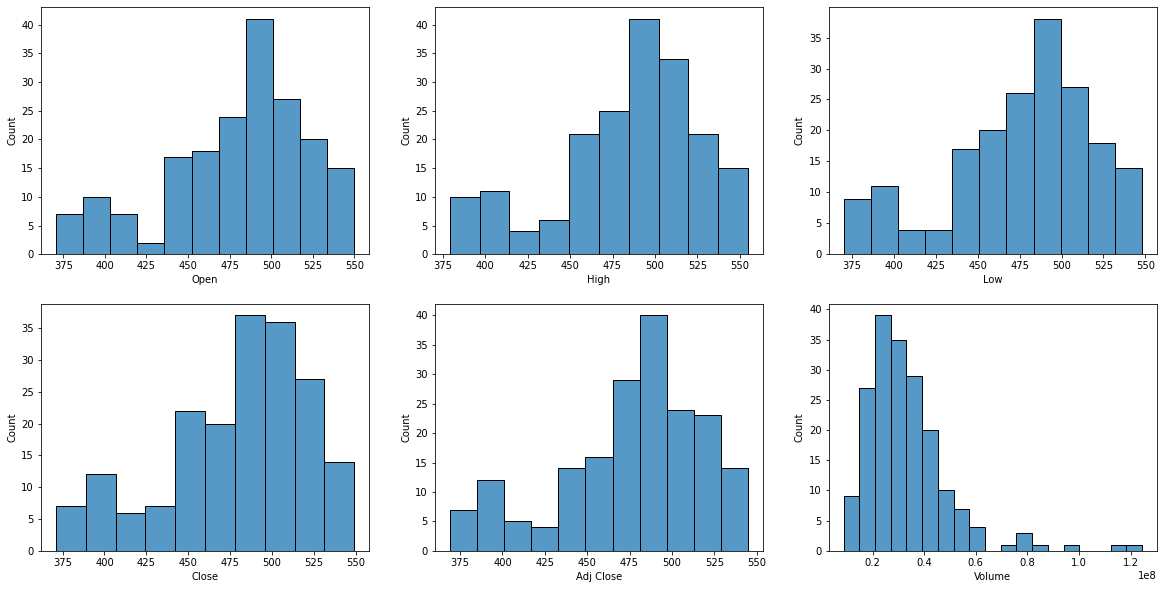

In [6]:

stock_features = data.columns
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(stock_features):
  plt.subplot(2, 3, i+1)
  sb.histplot(data[col])
plt.show()

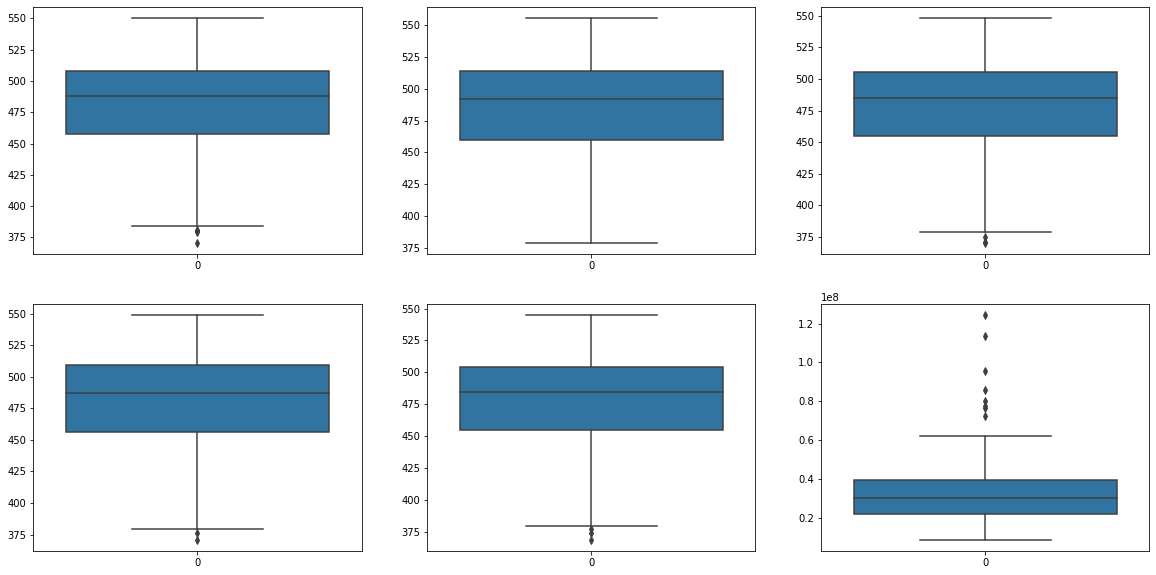

In [7]:
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(stock_features):
  plt.subplot(2, 3, i+1)
  sb.boxplot(data[col])
plt.show()

### What we get from it

- We found the prices is varied in up and low prices
- The transaction volume is very close to one another

---

## Golden Cross and Dead Cross

This mainly compare the short term day mean and long term day mean

- If the short term day mean greater than long term day mean after cross, we have high confidence the stock price will rise

- Otherwise we have confidence it will drop

- We common use the 20 days (1 month) and the 60 (3 month) days to compare

[*********************100%***********************]  1 of 1 completed


c:\Users\eddie\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


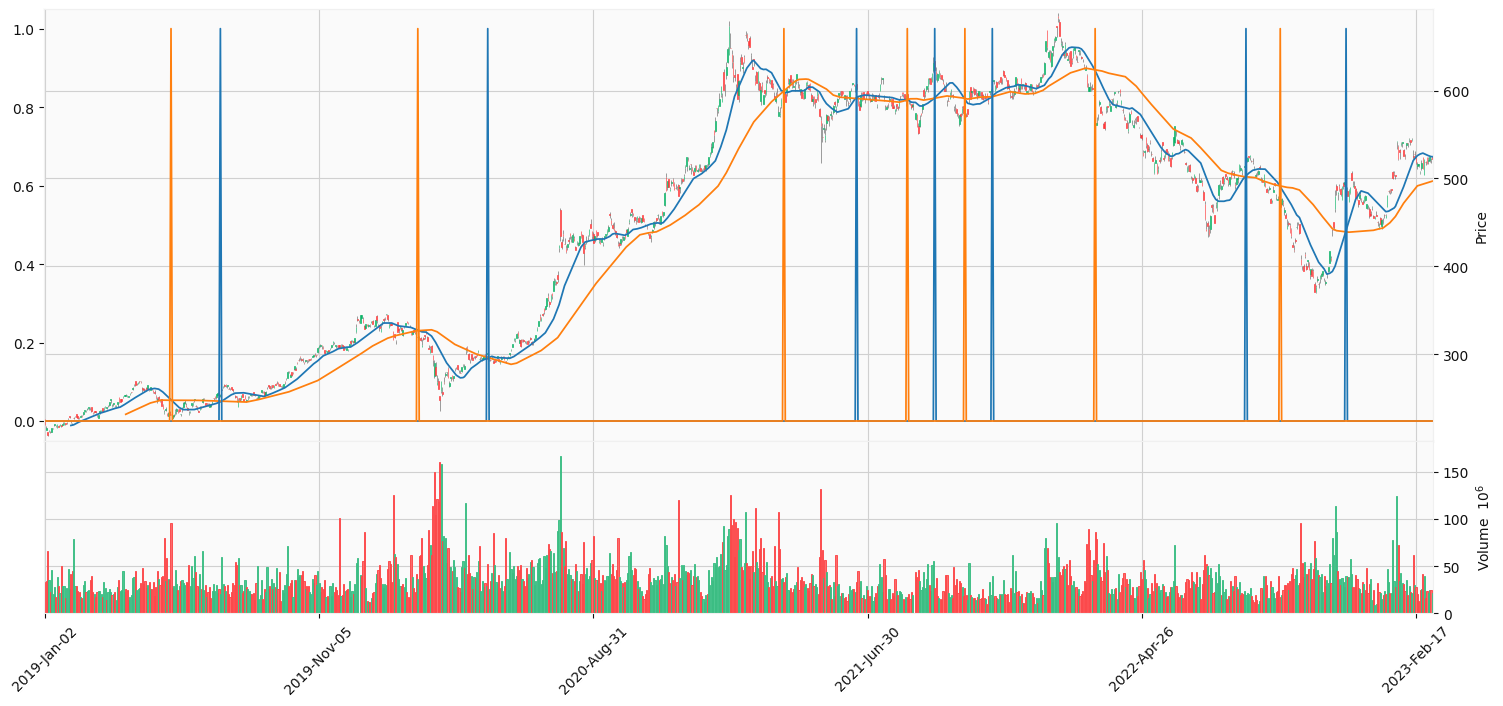

In [8]:
data: pd.DataFrame = yf.download('2330.TW',start='2019-1-1')

check_day = [20, 60]
day_mean= pd.DataFrame()

for i in check_day:
    day_mean[i] = data['Close'].rolling(window=i).mean()

entries = (day_mean[check_day[0]] > day_mean[check_day[1]]) & (day_mean[check_day[0]].shift() < day_mean[check_day[1]].shift())
exits = (day_mean[check_day[0]] < day_mean[check_day[1]]) & (day_mean[check_day[0]].shift() > day_mean[check_day[1]].shift())

entries_plot = mpl.make_addplot(entries)
exits_plot = mpl.make_addplot(exits)
day_mean_apds = mpl.make_addplot(day_mean)
    
mpl.plot(data,type='candle',
     style='yahoo',
     addplot=[day_mean_apds, entries_plot, exits_plot],
     volume=True,figsize=(16, 7),
     tight_layout=True
)

### What we get from it

- After orange line the stock price we predict it will drop
- After blue line the stock price we predict it will drop

---

### Let's try change the short term and long term

- Set long term to 180 days
- Set short term to 60 days

[*********************100%***********************]  1 of 1 completed


c:\Users\eddie\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


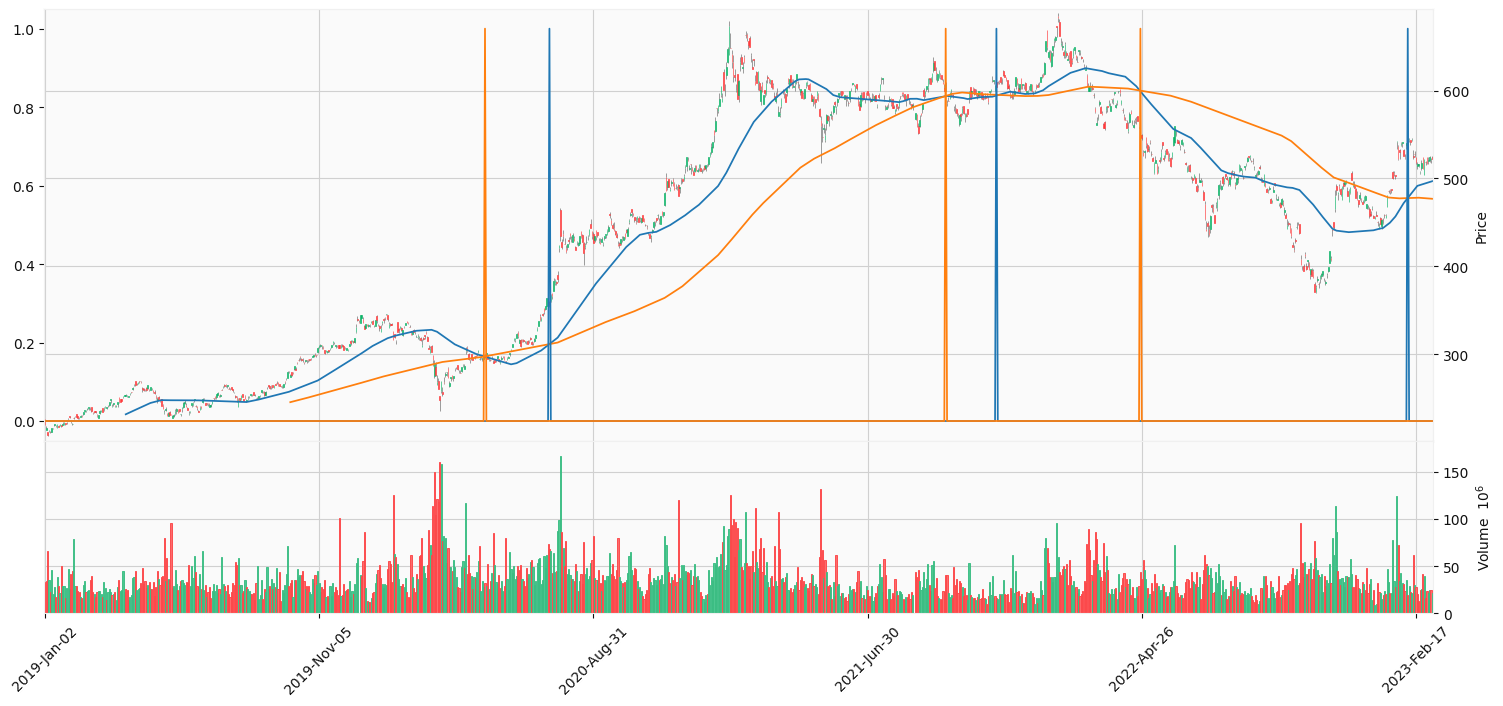

In [9]:
data: pd.DataFrame = yf.download('2330.TW',start='2019-1-1')

check_day = [60, 180]
day_mean= pd.DataFrame()

for i in check_day:
    day_mean[i] = data['Close'].rolling(window=i).mean()
    
entries = (day_mean[check_day[0]] > day_mean[check_day[1]]) & (day_mean[check_day[0]].shift() < day_mean[check_day[1]].shift())
exits = (day_mean[check_day[0]] < day_mean[check_day[1]]) & (day_mean[check_day[0]].shift() > day_mean[check_day[1]].shift())

entries_plot = mpl.make_addplot(entries)
exits_plot = mpl.make_addplot(exits)
day_mean_apds = mpl.make_addplot(day_mean)
    
mpl.plot(data,type='candle',
     style='yahoo',
     addplot=[day_mean_apds, entries_plot, exits_plot],
     volume=True,figsize=(16, 7),
     tight_layout=True
)

### What we get from it

- This can make the assessment more conservative

---

## Bollinger Bands

- Bollinger Bands are a kind of analysis of stock
- Developed by John Bollinger
- Using statistics standard deviation to mark up and down of average price
- Because using the moving price the Bollinger Bands will adjust to fit curent price

---

### Parameters

Bollinger Bands forcus on two variable

- Period day
- Z sore

#### Period day

We consider the period of the day we take for each adjust Bollinger Bands
- If the value set too small the Bollinger Bands width will be more smaller, 
that mean it will more likely close to the average price. 
- This is decided by how long you will keep your stock


#### Z score

The confidence of the value of our predict

- if the value set higher, meaning the predict points will be lesser as it is hard to achieve
- But in this case we have more confidence to make sure our predictions are correct

---

### So how can we set the best value of the stock

We will decide how long we want to deal with the stock into 3 cast

- Short term
- Medium term
- Long term

### We make the period day and z score of each cast

- Short term : Periods 10 day with z score 1.5
- Medium term : Periods 20 day with z score 2
- Long term : Periods 50 day with z score 2.5

`Note : The default set will need to adjust for current company we focus`

---

## Short term of TSMC

In [10]:
data: pd.DataFrame = yf.download('2330.TW',start='2022-6-1')

[*********************100%***********************]  1 of 1 completed


### Set the peroods and z score

In [11]:
check_day = 10
z_score = 1.5

### Calculate the Bollinger Bands 

In [12]:
day_mean = {}
b_band_up = {}
b_band_down = {}

day_mean[check_day] = data['Close'].rolling(window=check_day).mean()

b_band_up[check_day] = data['Close'].rolling(window=check_day).mean() + \
                       z_score * data['Close'].rolling(window=check_day).std()
b_band_down[check_day] = data['Close'].rolling(window=check_day).mean() - \
                         z_score * data['Close'].rolling(window=check_day).std()
                         
temp = 0

up_focus = b_band_up[check_day][data['High'] > (b_band_up[check_day] - temp)]
down_focus = b_band_down[check_day][data['Low'] < (b_band_down[check_day] + temp)]

b_band = pd.DataFrame({
    f'day_mean[{check_day}]':day_mean[check_day],
    f'b_band_up[{check_day}]':b_band_up[check_day],
    f'b_band_down[{check_day}]':b_band_down[check_day],
    'up_focus':up_focus,
    'down_focus':down_focus
})

b_band.iloc[check_day:]

,day_mean[10],b_band_up[10],b_band_down[10],up_focus,down_focus
Date,,,,,
2022-06-16,527.60,549.362353,505.837647,NaN,NaN
2022-06-17,523.70,547.658819,499.741181,NaN,499.741181
2022-06-20,519.50,544.572395,494.427605,NaN,NaN
2022-06-21,516.50,540.966814,492.033186,NaN,NaN
2022-06-22,511.55,533.213477,489.886523,NaN,NaN
...,...,...,...,...,...
2023-03-03,517.20,525.708819,508.691181,NaN,NaN
2023-03-06,516.50,523.254628,509.745372,523.254628,NaN
2023-03-07,517.10,524.730531,509.469469,524.730531,NaN


### Plot the result

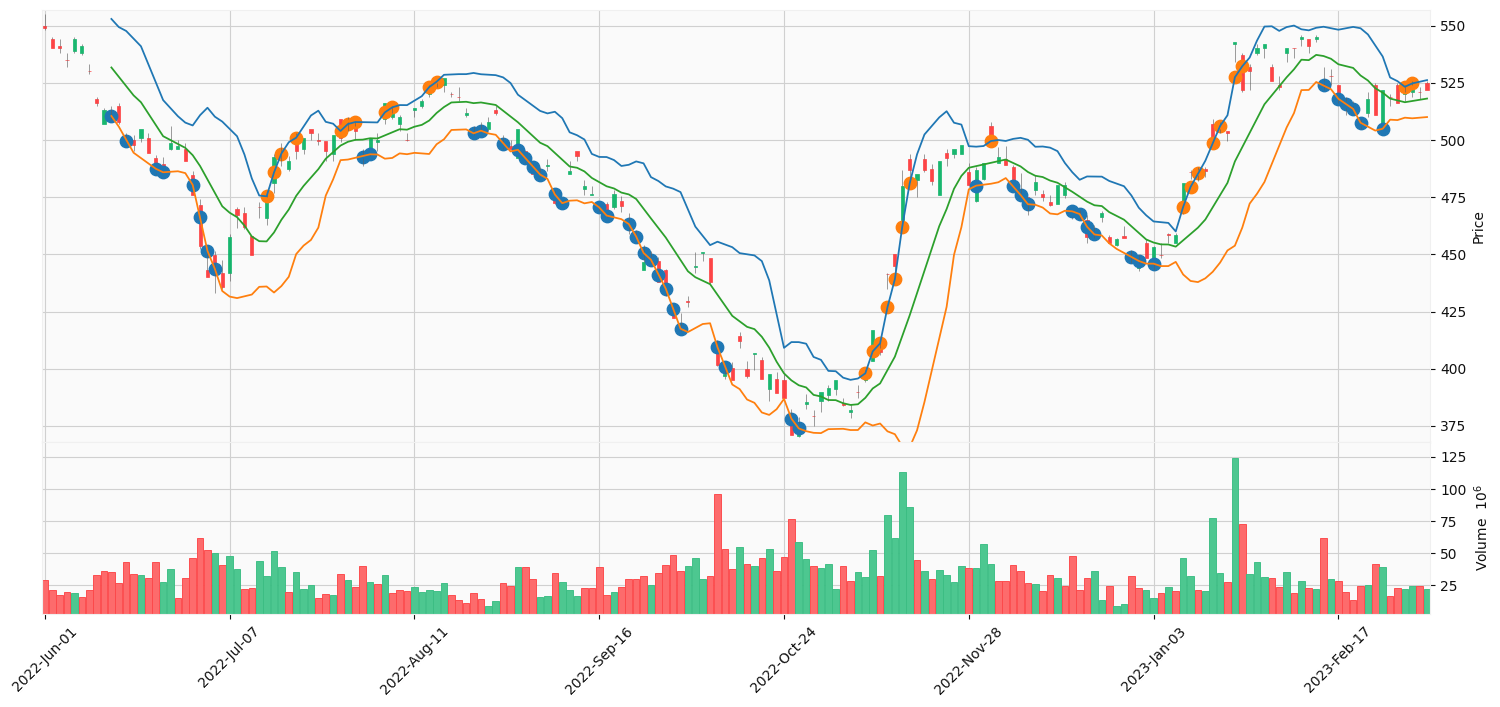

In [13]:
apds = mpl.make_addplot(b_band[[f'b_band_up[{check_day}]',f'b_band_down[{check_day}]']])
day_mean_apds = mpl.make_addplot(b_band[f'day_mean[{check_day}]'])

if up_focus.empty:
    focus = ['down_focus']
elif down_focus.empty:
    focus = ['up_focus']
else:
    focus = ['down_focus', 'up_focus']

if not b_band[focus].dropna(how='all').empty:   
    focus_apds = mpl.make_addplot(b_band[focus],type='scatter',markersize=80)
    
    mpl.plot(data,type='candle',
             style='yahoo',
             addplot=[apds, focus_apds, day_mean_apds],
             volume=True,figsize=(16, 7),
             tight_layout=True
    )
else:
    mpl.plot(data,type='candle',
             style='yahoo',
             addplot=[apds, day_mean_apds],
             volume=True,figsize=(16, 7),
             tight_layout=True
    )

### What we get from it

- In this cast we see there are too many points on it which most of them are incorrect.
- That cause by the price change a lot in short term
- Which means the price is not stable in short term

### We fix it by increasing the z value to 2.35

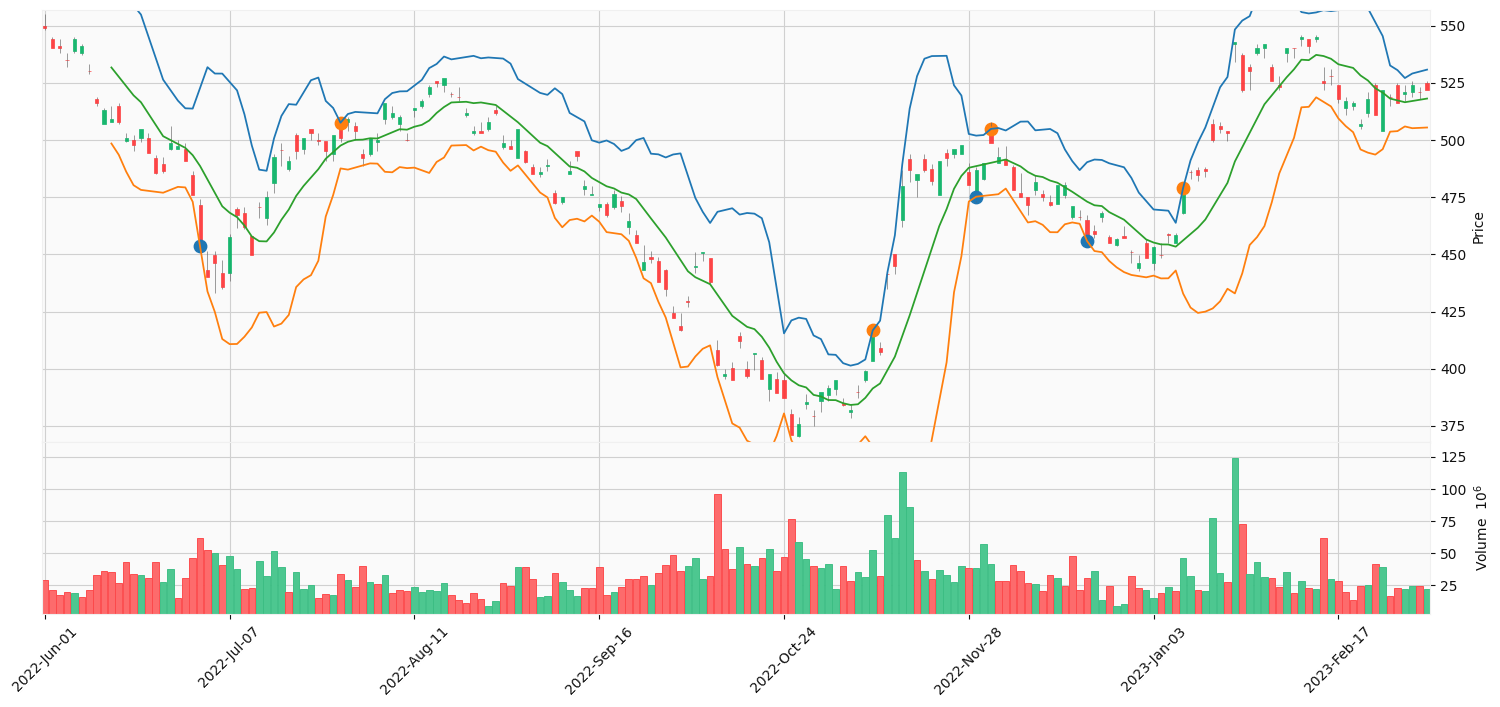

In [14]:
check_day = 10
z_score = 2.35

day_mean = {}
b_band_up = {}
b_band_down = {}

day_mean[check_day] = data['Close'].rolling(window=check_day).mean()

b_band_up[check_day] = data['Close'].rolling(window=check_day).mean() + \
                       z_score * data['Close'].rolling(window=check_day).std()
b_band_down[check_day] = data['Close'].rolling(window=check_day).mean() - \
                         z_score * data['Close'].rolling(window=check_day).std()
                         
temp = 0

up_focus = b_band_up[check_day][data['High'] > (b_band_up[check_day] - temp)]
down_focus = b_band_down[check_day][data['Low'] < (b_band_down[check_day] + temp)]

b_band = pd.DataFrame({
    f'day_mean[{check_day}]':day_mean[check_day],
    f'b_band_up[{check_day}]':b_band_up[check_day],
    f'b_band_down[{check_day}]':b_band_down[check_day],
    'up_focus':up_focus,
    'down_focus':down_focus
})

apds = mpl.make_addplot(b_band[[f'b_band_up[{check_day}]',f'b_band_down[{check_day}]']])
day_mean_apds = mpl.make_addplot(b_band[f'day_mean[{check_day}]'])

if up_focus.empty:
    focus = ['down_focus']
elif down_focus.empty:
    focus = ['up_focus']
else:
    focus = ['down_focus', 'up_focus']

if not b_band[focus].dropna(how='all').empty:   
    focus_apds = mpl.make_addplot(b_band[focus],type='scatter',markersize=80)
    
    mpl.plot(data,type='candle',
             style='yahoo',
             addplot=[apds,focus_apds, day_mean_apds],
             volume=True,figsize=(16, 7),
             tight_layout=True
    )
else:
    mpl.plot(data,type='candle',
             style='yahoo',
             addplot=[apds, day_mean_apds],
             volume=True,figsize=(16, 7),
             tight_layout=True
    )

### What we get from it

Now this is the predict of 10 day period price change
- In this cast we see the result more correctly
- The orange point is where we create sell offer
- The blue point is where we create buy order

---

## Medium term of TSMC

[*********************100%***********************]  1 of 1 completed


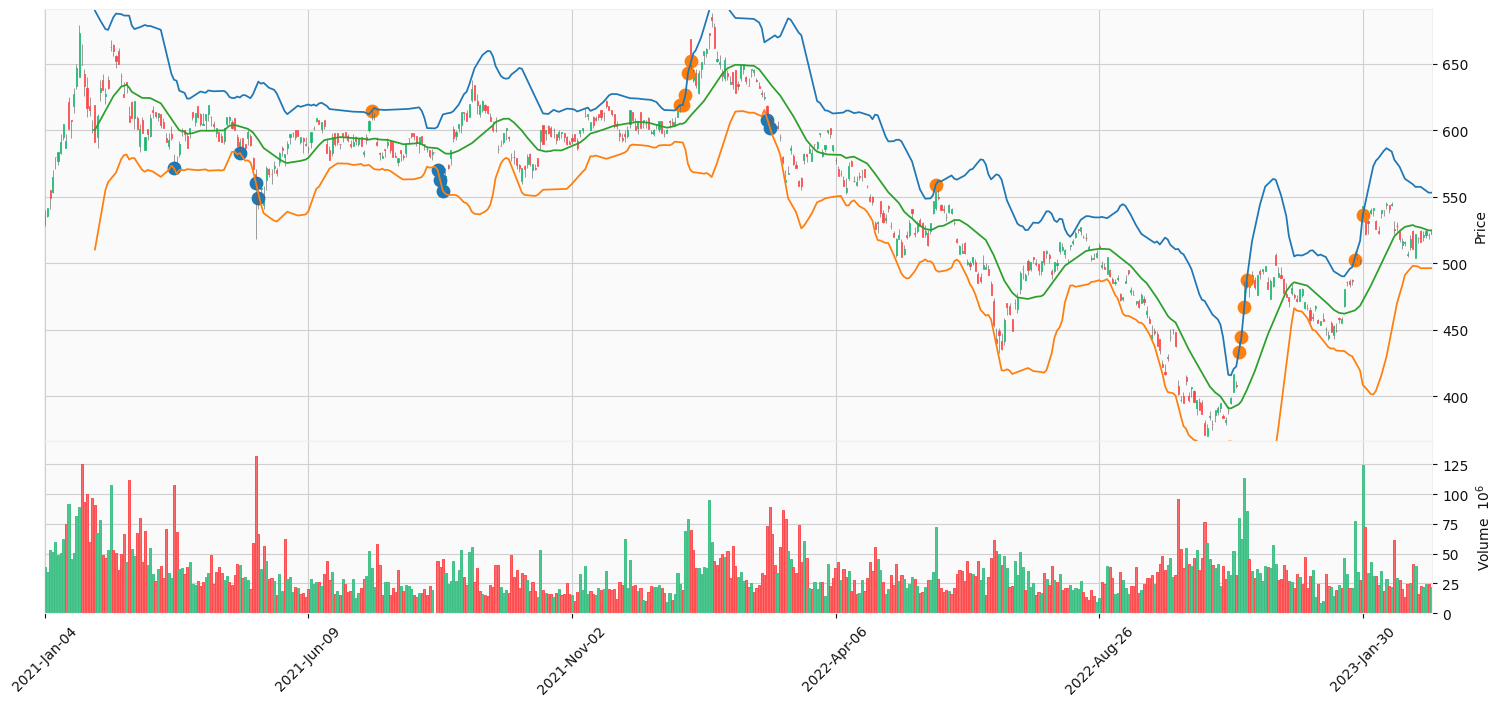

In [15]:
data: pd.DataFrame = yf.download('2330.TW',start='2021-1-1')

check_day = 20
z_score = 2.5

day_mean = {}
b_band_up = {}
b_band_down = {}

day_mean[check_day] = data['Close'].rolling(window=check_day).mean()

b_band_up[check_day] = data['Close'].rolling(window=check_day).mean() + \
                       z_score * data['Close'].rolling(window=check_day).std()
b_band_down[check_day] = data['Close'].rolling(window=check_day).mean() - \
                         z_score * data['Close'].rolling(window=check_day).std()
                         
temp = 0

up_focus = b_band_up[check_day][data['High'] > (b_band_up[check_day] - temp)]
down_focus = b_band_down[check_day][data['Low'] < (b_band_down[check_day] + temp)]

b_band = pd.DataFrame({
    f'day_mean[{check_day}]':day_mean[check_day],
    f'b_band_up[{check_day}]':b_band_up[check_day],
    f'b_band_down[{check_day}]':b_band_down[check_day],
    'up_focus':up_focus,
    'down_focus':down_focus
})

apds = mpl.make_addplot(b_band[[f'b_band_up[{check_day}]',f'b_band_down[{check_day}]']])
day_mean_apds = mpl.make_addplot(b_band[f'day_mean[{check_day}]'])

if up_focus.empty:
    focus = ['down_focus']
elif down_focus.empty:
    focus = ['up_focus']
else:
    focus = ['down_focus', 'up_focus']

if not b_band[focus].dropna(how='all').empty:   
    focus_apds = mpl.make_addplot(b_band[focus],type='scatter',markersize=80)
    
    mpl.plot(data,type='candle',
             style='yahoo',
             addplot=[apds,focus_apds, day_mean_apds],
             volume=True,figsize=(16, 7),
             tight_layout=True
    )
else:
    mpl.plot(data,type='candle',
             style='yahoo',
             addplot=[apds, day_mean_apds],
             volume=True,figsize=(16, 7),
             tight_layout=True
    )

---

## Long term of TSMC

[*********************100%***********************]  1 of 1 completed


c:\Users\eddie\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


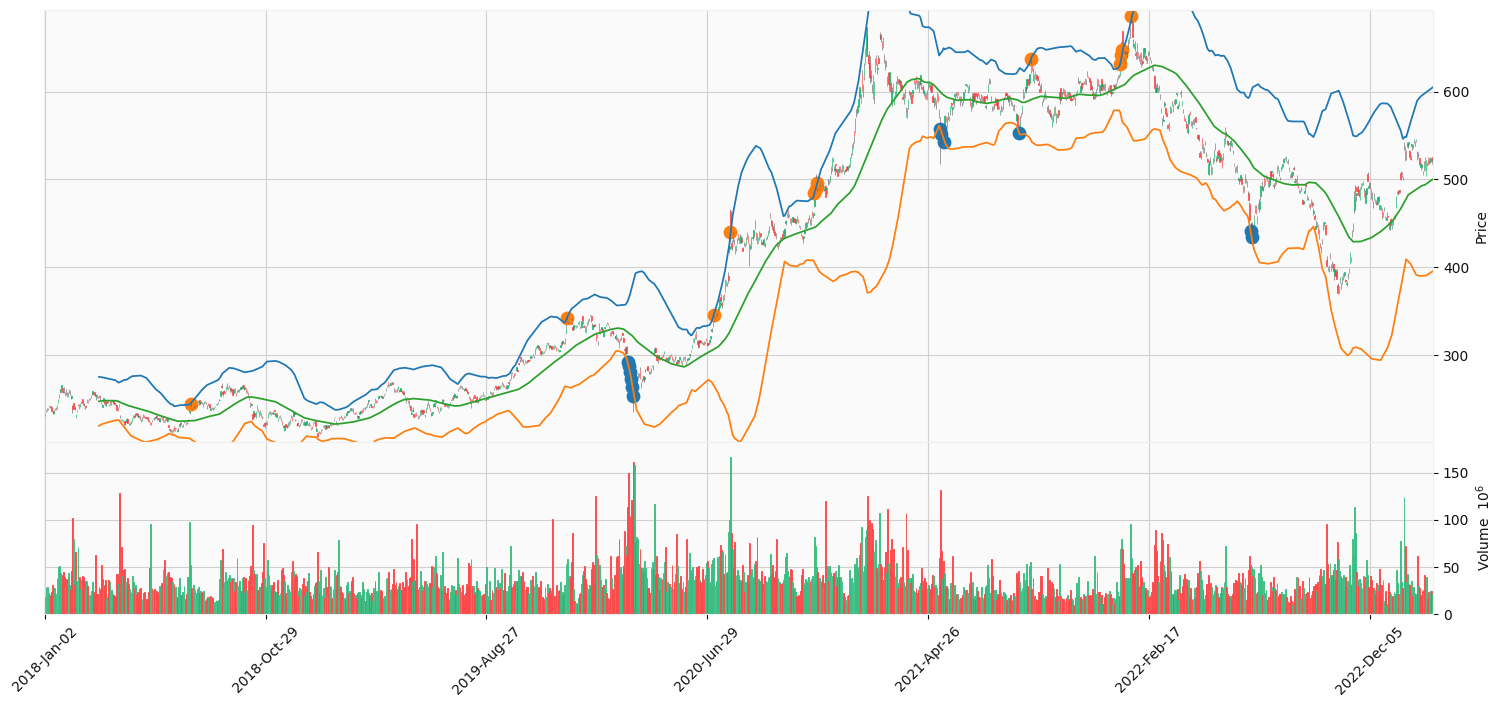

In [16]:
data: pd.DataFrame = yf.download('2330.TW',start='2018-1-1')

check_day = 50
z_score = 3.2

day_mean = {}
b_band_up = {}
b_band_down = {}

day_mean[check_day] = data['Close'].rolling(window=check_day).mean()

b_band_up[check_day] = data['Close'].rolling(window=check_day).mean() + \
                       z_score * data['Close'].rolling(window=check_day).std()
b_band_down[check_day] = data['Close'].rolling(window=check_day).mean() - \
                         z_score * data['Close'].rolling(window=check_day).std()
                         
temp = 0

up_focus = b_band_up[check_day][data['High'] > (b_band_up[check_day] - temp)]
down_focus = b_band_down[check_day][data['Low'] < (b_band_down[check_day] + temp)]

b_band = pd.DataFrame({
    f'day_mean[{check_day}]':day_mean[check_day],
    f'b_band_up[{check_day}]':b_band_up[check_day],
    f'b_band_down[{check_day}]':b_band_down[check_day],
    'up_focus':up_focus,
    'down_focus':down_focus
})

apds = mpl.make_addplot(b_band[[f'b_band_up[{check_day}]',f'b_band_down[{check_day}]']])
day_mean_apds = mpl.make_addplot(b_band[f'day_mean[{check_day}]'])

if up_focus.empty:
    focus = ['down_focus']
elif down_focus.empty:
    focus = ['up_focus']
else:
    focus = ['down_focus', 'up_focus']

if not b_band[focus].dropna(how='all').empty:   
    focus_apds = mpl.make_addplot(b_band[focus],type='scatter',markersize=80)
    
    mpl.plot(data,type='candle',
             style='yahoo',
             addplot=[apds, focus_apds, day_mean_apds],
             volume=True,figsize=(16, 7),
             tight_layout=True
    )
else:
    mpl.plot(data,type='candle',
             style='yahoo',
             addplot=[apds, day_mean_apds],
             volume=True,figsize=(16, 7),
             tight_layout=True
    )

---

## Stock Prediction
- We are using Prophet to do it

### Prophet

- A modal made by Meta
- It work good with time Series
- It is a modal for non-linear trends
- Fit with yearly, weekly and daily

In [17]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


### Download TSMC data

In [18]:
data: pd.DataFrame = yf.download('2330.TW',start='2018-1-1')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,231.5,232.5,231.0,232.5,200.009277,18055269
2018-01-03,236.0,238.0,235.5,237.0,203.880402,29308091
2018-01-04,240.0,240.0,236.5,239.5,206.031067,29096613
2018-01-05,240.0,240.0,238.0,240.0,206.461182,22438255
2018-01-08,242.0,242.5,240.5,242.0,208.181656,20233692
...,...,...,...,...,...,...
2023-03-03,524.0,525.0,516.0,516.0,516.000000,23253895
2023-03-06,520.0,524.0,517.0,521.0,521.000000,21922085
2023-03-07,521.0,526.0,519.0,524.0,524.000000,24861078


### Modify the data we need

- We only need the close price of the day and the date

In [19]:
data = data[['Close']]
data.reset_index(inplace=True)
data

,Date,Close
0,2018-01-02,232.5
1,2018-01-03,237.0
2,2018-01-04,239.5
3,2018-01-05,240.0
4,2018-01-08,242.0
...,...,...
1253,2023-03-03,516.0
1254,2023-03-06,521.0
1255,2023-03-07,524.0
1256,2023-03-08,521.0


### Rename data
- Prophet take column name `ds` as time
- And take `y` as price
- We need to rename before fit to modal

In [20]:
data = data.rename({'Date': 'ds', 'Close':'y'}, axis='columns')
data


,ds,y
0,2018-01-02,232.5
1,2018-01-03,237.0
2,2018-01-04,239.5
3,2018-01-05,240.0
4,2018-01-08,242.0
...,...,...
1253,2023-03-03,516.0
1254,2023-03-06,521.0
1255,2023-03-07,524.0
1256,2023-03-08,521.0


### Fit data
- Default is weekly and yearly seasonalities
- We can enable daily by `daily_seasonality=True`

In [21]:
modal = Prophet()
modal.fit(data)

16:13:17 - cmdstanpy - INFO - Chain [1] start processing
16:13:17 - cmdstanpy - INFO - Chain [1] done processing


### Make future data

In [22]:
future_day = modal.make_future_dataframe(periods=365)
future_day

,ds
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
1618,2024-03-04
1619,2024-03-05
1620,2024-03-06
1621,2024-03-07


In [23]:
future_price = modal.predict(future_day)
future_price

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,205.063920,194.885400,246.490552,205.063920,205.063920,14.658059,14.658059,14.658059,-5.072170,-5.072170,-5.072170,19.730229,19.730229,19.730229,0.0,0.0,0.0,219.721979
1,2018-01-03,205.342025,197.362788,246.972878,205.342025,205.342025,16.705180,16.705180,16.705180,-4.859260,-4.859260,-4.859260,21.564440,21.564440,21.564440,0.0,0.0,0.0,222.047205
2,2018-01-04,205.620130,198.505548,247.985824,205.620130,205.620130,18.892133,18.892133,18.892133,-4.552345,-4.552345,-4.552345,23.444478,23.444478,23.444478,0.0,0.0,0.0,224.512263
3,2018-01-05,205.898236,202.483113,251.661415,205.898236,205.898236,20.558828,20.558828,20.558828,-4.797934,-4.797934,-4.797934,25.356762,25.356762,25.356762,0.0,0.0,0.0,226.457063
4,2018-01-08,206.732551,206.538630,256.230553,206.732551,206.732551,25.525817,25.525817,25.525817,-5.622802,-5.622802,-5.622802,31.148619,31.148619,31.148619,0.0,0.0,0.0,232.258368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2024-03-04,302.829801,151.914846,493.535743,121.399733,460.489137,29.644683,29.644683,29.644683,-5.622802,-5.622802,-5.622802,35.267484,35.267484,35.267484,0.0,0.0,0.0,332.474484
1619,2024-03-05,302.458699,150.305534,489.233995,120.438447,460.637592,28.491430,28.491430,28.491430,-5.072170,-5.072170,-5.072170,33.563600,33.563600,33.563600,0.0,0.0,0.0,330.950129
1620,2024-03-06,302.087597,140.989152,491.949781,119.441274,460.772400,26.984071,26.984071,26.984071,-4.859260,-4.859260,-4.859260,31.843332,31.843332,31.843332,0.0,0.0,0.0,329.071668
1621,2024-03-07,301.716495,146.813622,482.825026,118.461649,460.960177,25.567866,25.567866,25.567866,-4.552345,-4.552345,-4.552345,30.120211,30.120211,30.120211,0.0,0.0,0.0,327.284360


### Plot the result

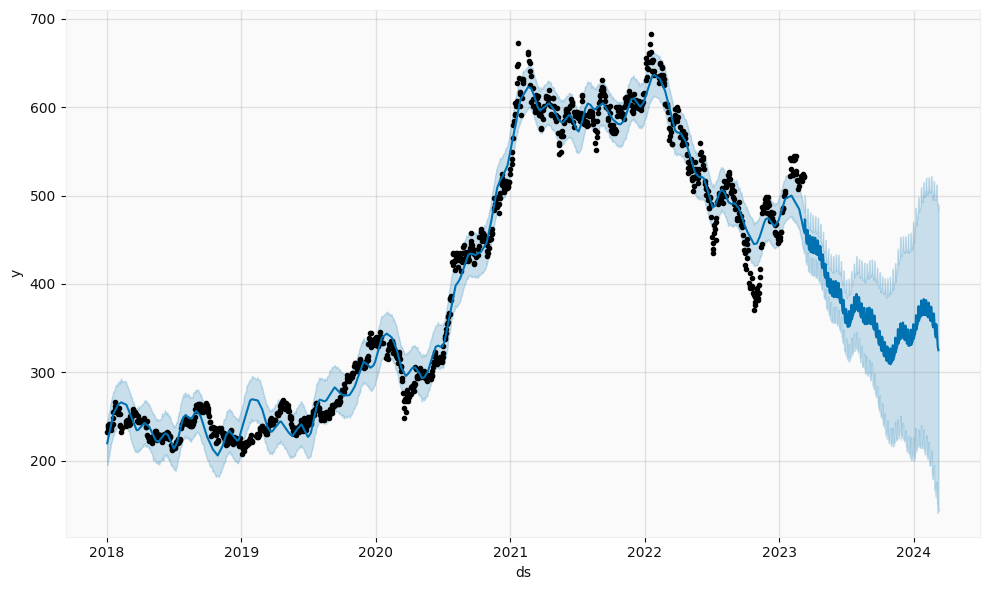

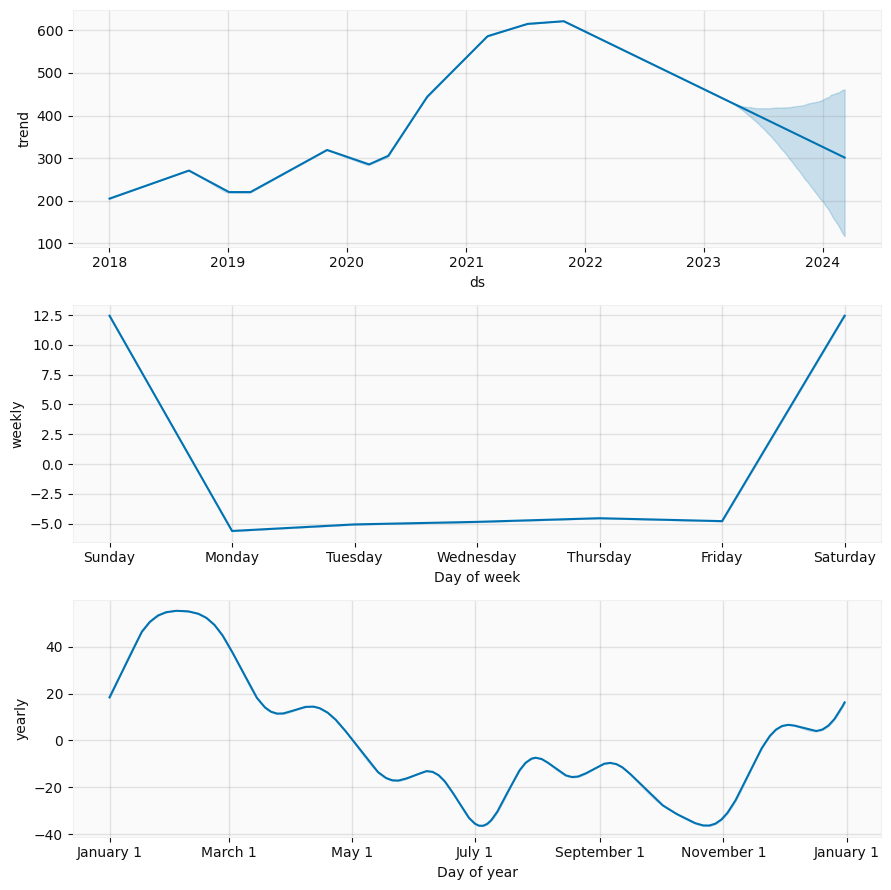

In [24]:
figure1 = modal.plot(future_price)
figure2 = modal.plot_components(future_price)

### What we get from it

Now this is the predict of future year
- From trend we can know the price will be drop
- From weekly we know the best timing to buy is Monday
- From monthly we know the best timing to buy will locate at July and November